In [1]:
%pip install nnfs
%pip install matplotlib
%pip install pandas

  Using cached numpy-2.3.0-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.3.0-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [nnfs]1/2 [nnfs]
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.1 MB/

In [2]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

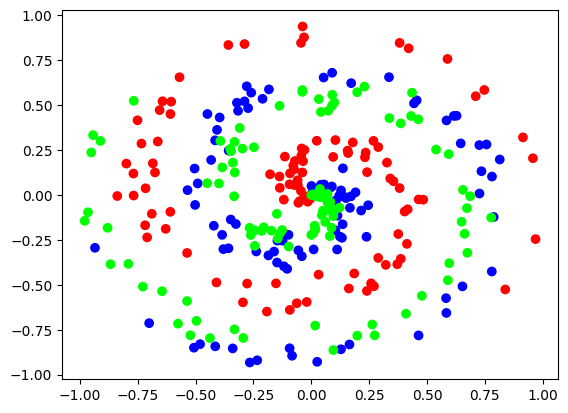

<Figure size 640x480 with 0 Axes>

In [3]:
x,y =spiral_data(samples=100,classes=3)

plt.scatter(x[:,0],x[:,1],c=y , cmap='brg')
# x axis -- x[:,0]
# y axis -- x[:,1]
# y -- clases of differnet data 
plt.show()
plt.savefig('fig.png')

In [4]:
#Dense layer class
#within the dense layer class , the constructor does is that it initialises the weights and biases
#thr
import nnfs
import numpy as np
from nnfs.datasets import spiral_data
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights=0.01*(np.random.randn(n_inputs,n_neurons))
        # print(self.weights)
        self.biases=np.zeros((1,n_neurons))
    def forward(self,input):
        output=np.dot(input,self.weights)+self.biases
        return output

In [5]:
X,y=spiral_data(samples=100,classes=2)
dense=Dense(2,4)
output=dense.forward(X)
print (output[:5])
print(np.shape(output))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00127727e-05 -3.78704754e-05 -9.80228924e-06 -1.13629554e-04]
 [-5.84618720e-05 -1.17215837e-04 -2.94910657e-04 -3.20231047e-04]
 [-1.09512861e-04 -1.75636567e-04 -5.06707118e-04 -4.72125306e-04]
 [ 2.40915252e-08 -1.83172044e-04 -1.90578736e-04 -5.32573089e-04]]
(200, 4)


In [6]:
#Activation functions 
#lets code a total neural network with two dense layer each with relu function and a softmax function in the outputlayer 
#for the probablities
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Dense_Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights=0.01*np.random.randn(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases
        return self.output

class ReLu_Activation:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)
        return self.output


class Softmax_Activation:
    def forward(self,inputs):
        normalized=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probablities=normalized/(np.sum(normalized,axis=1,keepdims=True))
        return probablities

In [7]:

x,y=spiral_data(samples=100,classes=4)
dense1=Dense_Layer(2,512)
dense2=Dense_Layer(512,4)
dense1_output=dense1.forward(x)
relu=ReLu_Activation()
relu_output=relu.forward(dense1_output)
dense2_output=dense2.forward(relu_output)
softmax=Softmax_Activation()
output=softmax.forward(dense2_output)
print(output[:5])

[[0.25       0.25       0.25       0.25      ]
 [0.24999815 0.25000668 0.24999452 0.25000066]
 [0.25000364 0.25000727 0.24998814 0.25000098]
 [0.25000685 0.24999951 0.2499853  0.25000834]
 [0.25001004 0.2500006  0.24997965 0.2500097 ]]


/Users/sr/Documents/NNFS/venv/lib/python3.13/site-packages/nnfs/core.py:22: RuntimeWarning: divide by zero encountered in dot
  return orig_dot(*[a.astype('float64') for a in args], **kwargs).astype('float32')
/Users/sr/Documents/NNFS/venv/lib/python3.13/site-packages/nnfs/core.py:22: RuntimeWarning: overflow encountered in dot
  return orig_dot(*[a.astype('float64') for a in args], **kwargs).astype('float32')
/Users/sr/Documents/NNFS/venv/lib/python3.13/site-packages/nnfs/core.py:22: RuntimeWarning: invalid value encountered in dot
  return orig_dot(*[a.astype('float64') for a in args], **kwargs).astype('float32')


In [14]:
output[range(len(output)),y]

array([0.25      , 0.24999815, 0.25000364, 0.25000685, 0.25001004,
       0.24997626, 0.25001833, 0.25000957, 0.2500176 , 0.25002706,
       0.25003058, 0.2500172 , 0.25002265, 0.25003156, 0.25002617,
       0.25002766, 0.24998431, 0.25003192, 0.2500174 , 0.25003916,
       0.25004247, 0.24997479, 0.24995689, 0.25002483, 0.24989346,
       0.2500416 , 0.24994972, 0.2499497 , 0.24987423, 0.24986699,
       0.24989082, 0.24987254, 0.24991782, 0.2499707 , 0.2498642 ,
       0.24984193, 0.24973887, 0.24970372, 0.24982671, 0.24981192,
       0.24982463, 0.2498251 , 0.24982381, 0.24954058, 0.2497002 ,
       0.24964394, 0.24973415, 0.24950098, 0.24971767, 0.24949616,
       0.24951509, 0.24945678, 0.24945882, 0.24945807, 0.24943513,
       0.24951632, 0.2494811 , 0.24954446, 0.24941367, 0.24948387,
       0.2494563 , 0.24954344, 0.24948329, 0.24935092, 0.24986228,
       0.24973199, 0.24944822, 0.2501315 , 0.24975403, 0.25013393,
       0.25020334, 0.2502082 , 0.25013784, 0.24999388, 0.25017

In [15]:
np.random.randn(1,3)

array([[ 0.06349048, -0.2213905 , -0.16339892]], dtype=float32)